In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(18,9)
plt.style.use('ggplot')

In [2]:
revenue_df = pd.read_csv('Downloads/enter-capital/consulting_part.csv', index_col='date', parse_dates=True)

In [3]:
revenue_df.head()

,revenue
date,
2015-01-01,11000
2015-02-01,14000
2015-03-01,19000
2015-04-01,20000
2015-05-01,15000


In [4]:
df = revenue_df.reset_index()

In [5]:
df.head()

,date,revenue
0,2015-01-01,11000
1,2015-02-01,14000
2,2015-03-01,19000
3,2015-04-01,20000
4,2015-05-01,15000


In [6]:
df=df.rename(columns={'date':'ds', 'revenue':'y'})

In [7]:
df.head()

,ds,y
0,2015-01-01,11000
1,2015-02-01,14000
2,2015-03-01,19000
3,2015-04-01,20000
4,2015-05-01,15000


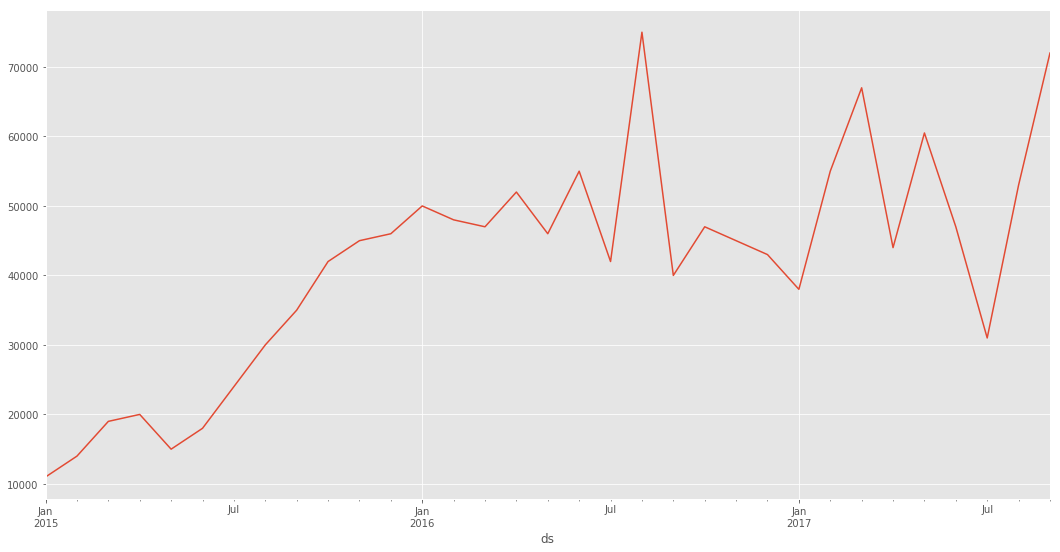

In [8]:
df.set_index('ds').y.plot()

In [9]:
df['y'] = np.log(df['y'])

In [10]:
df.tail()

,ds,y
28,2017-05-01,11.010399
29,2017-06-01,10.757903
30,2017-07-01,10.341742
31,2017-08-01,10.878047
32,2017-09-01,11.184421


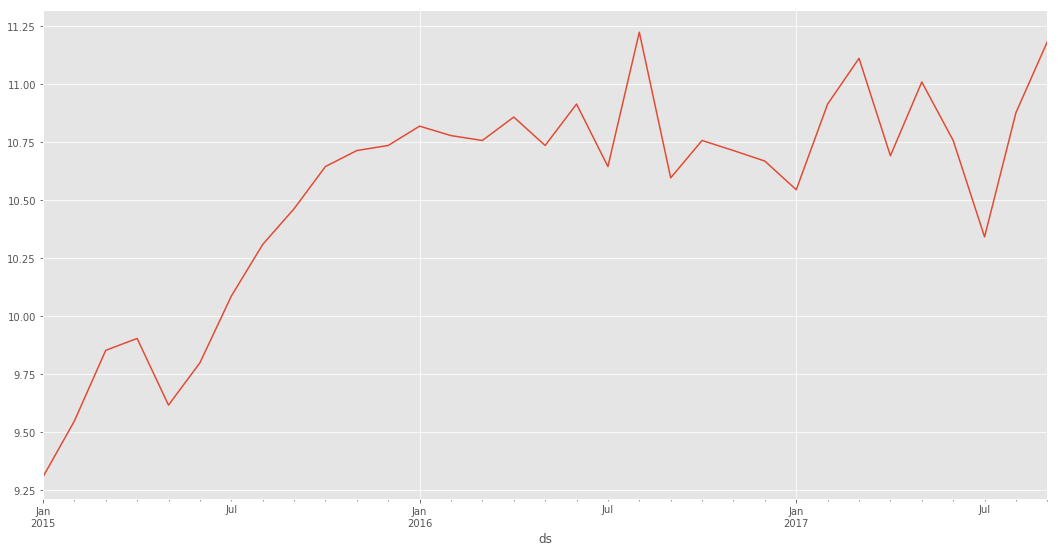

In [11]:
df.set_index('ds').y.plot()

In [13]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(df);

In [14]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
52,2019-04-30
53,2019-05-31
54,2019-06-30
55,2019-07-31
56,2019-08-31


In [15]:
forecast = model.predict(future)

In [16]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
52,2019-04-30,9.787682,7.725283,11.675909,6.987019,10.930381,0.397262,0.397262,0.397262,-0.741323,...,-0.741323,-0.741323,-0.741323,-0.183096,-0.183096,-0.183096,-0.955488,-0.955488,-0.955488,9.046358
53,2019-05-31,9.758797,7.555903,11.819225,7.247320,11.506488,0.397262,0.397262,0.397262,-0.313389,...,-0.313389,-0.313389,-0.313389,0.328006,0.328006,0.328006,-1.038656,-1.038656,-1.038656,9.445409
54,2019-06-30,9.730845,7.417958,11.915482,8.609937,13.113406,0.397262,0.397262,0.397262,1.195921,...,1.195921,1.195921,1.195921,0.022995,0.022995,0.022995,0.775664,0.775664,0.775664,10.926766
55,2019-07-31,9.701961,7.231183,12.062553,7.933518,12.759088,0.397262,0.397262,0.397262,0.697408,...,0.697408,0.697408,0.697408,-0.050611,-0.050611,-0.050611,0.350757,0.350757,0.350757,10.399368
56,2019-08-31,9.673077,7.061113,12.234205,7.624893,12.791882,0.397262,0.397262,0.397262,0.560555,...,0.560555,0.560555,0.560555,-0.238616,-0.238616,-0.238616,0.401909,0.401909,0.401909,10.233631


In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
52,2019-04-30,9.046358,6.987019,10.930381
53,2019-05-31,9.445409,7.247320,11.506488
54,2019-06-30,10.926766,8.609937,13.113406
55,2019-07-31,10.399368,7.933518,12.759088
56,2019-08-31,10.233631,7.624893,12.791882


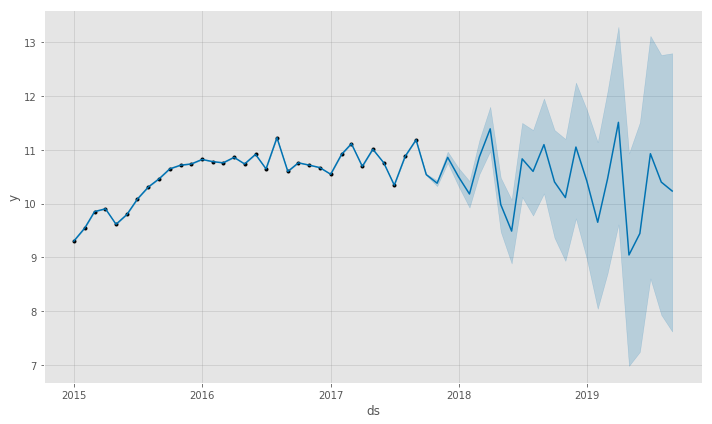

In [18]:
model.plot(forecast);

In [19]:
df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [20]:
viz_df = revenue_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

In [21]:
viz_df.head()

,revenue,yhat,yhat_lower,yhat_upper
2015-01-01,11000.0,9.305320,9.301454,9.309064
2015-02-01,14000.0,9.546611,9.542881,9.550380
2015-03-01,19000.0,9.852321,9.848864,9.856052
2015-04-01,20000.0,9.903790,9.900003,9.907467
2015-05-01,15000.0,9.615925,9.612199,9.619682


In [22]:
viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])

In [23]:
viz_df.head()

,revenue,yhat,yhat_lower,yhat_upper,yhat_rescaled
2015-01-01,11000.0,9.305320,9.301454,9.309064,10996.366277
2015-02-01,14000.0,9.546611,9.542881,9.550380,13997.174011
2015-03-01,19000.0,9.852321,9.848864,9.856052,19002.405724
2015-04-01,20000.0,9.903790,9.900003,9.907467,20006.055373
2015-05-01,15000.0,9.615925,9.612199,9.619682,15001.799826


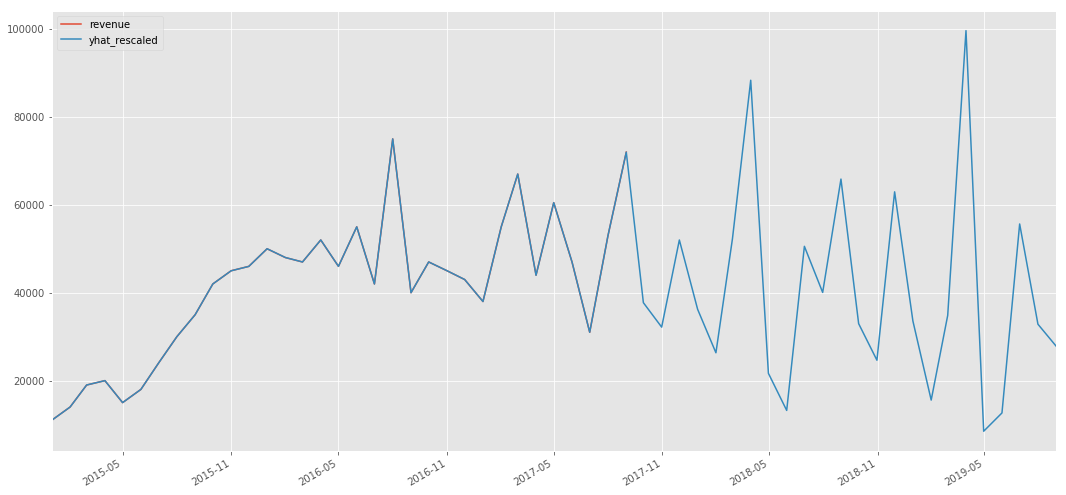

In [24]:
viz_df[['revenue', 'yhat_rescaled']].plot()

In [25]:
revenue_df.index = pd.to_datetime(revenue_df.index)
connect_date = revenue_df.index[-2]

In [26]:
mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [27]:
predict_df.head()

,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,seasonal_lower,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2017-09-01,10.352321,10.352321,10.352321,11.180377,11.188198,0.397262,0.397262,0.397262,0.831931,0.831931,...,0.831931,0.831931,0.831931,0.328006,0.328006,0.328006,0.106663,0.106663,0.106663,11.184251
2017-09-30,10.325300,10.312820,10.338276,10.525088,10.551262,0.397262,0.397262,0.397262,0.213095,0.213095,...,0.213095,0.213095,0.213095,-0.238616,-0.238616,-0.238616,0.054449,0.054449,0.054449,10.538395
2017-10-31,10.296416,10.243037,10.348062,10.324845,10.433093,0.397262,0.397262,0.397262,0.082541,0.082541,...,0.082541,0.082541,0.082541,-0.183096,-0.183096,-0.183096,-0.131624,-0.131624,-0.131624,10.378957
2017-11-30,10.268463,10.165806,10.372204,10.755811,10.963498,0.397262,0.397262,0.397262,0.590576,0.590576,...,0.590576,0.590576,0.590576,-0.142466,-0.142466,-0.142466,0.335780,0.335780,0.335780,10.859039
2017-12-31,10.239579,10.064340,10.402474,10.320576,10.660841,0.397262,0.397262,0.397262,0.257856,0.257856,...,0.257856,0.257856,0.257856,0.022995,0.022995,0.022995,-0.162401,-0.162401,-0.162401,10.497435


In [28]:
viz_df = revenue_df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df['yhat_scaled']=np.exp(viz_df['yhat'])

In [29]:
viz_df.head()

,revenue,yhat,yhat_lower,yhat_upper,yhat_scaled
2015-01-01,11000.0,NaN,NaN,NaN,NaN
2015-02-01,14000.0,NaN,NaN,NaN,NaN
2015-03-01,19000.0,NaN,NaN,NaN,NaN
2015-04-01,20000.0,NaN,NaN,NaN,NaN
2015-05-01,15000.0,NaN,NaN,NaN,NaN


In [30]:
viz_df.tail()

,revenue,yhat,yhat_lower,yhat_upper,yhat_scaled
2019-04-30,NaN,9.046358,6.987019,10.930381,8487.572282
2019-05-31,NaN,9.445409,7.247320,11.506488,12649.952177
2019-06-30,NaN,10.926766,8.609937,13.113406,55646.001706
2019-07-31,NaN,10.399368,7.933518,12.759088,32838.874978
2019-08-31,NaN,10.233631,7.624893,12.791882,27823.361769


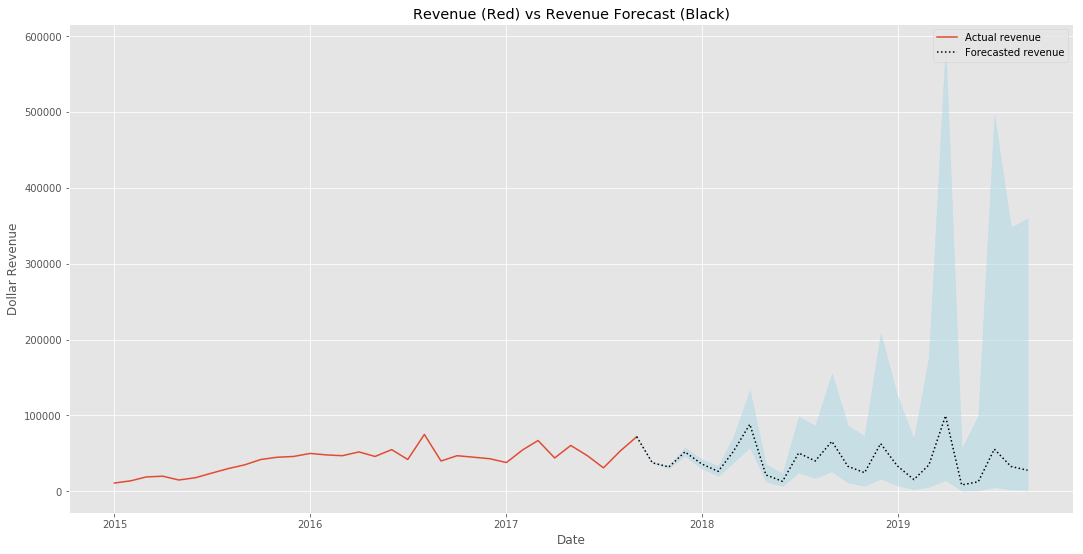

In [34]:
fig, ax1 = plt.subplots()
ax1.plot(viz_df.revenue)
ax1.plot(viz_df.yhat_scaled, color='black', linestyle=':')
ax1.fill_between(viz_df.index, np.exp(viz_df['yhat_upper']), np.exp(viz_df['yhat_lower']), alpha=0.5, color='lightblue')
ax1.set_title('Revenue (Red) vs Revenue Forecast (Black)')
ax1.set_ylabel('Dollar Revenue')
ax1.set_xlabel('Date')
L=ax1.legend()
L.get_texts()[0].set_text('Actual revenue')
L.get_texts()[1].set_text('Forecasted revenue')